In [1]:
import json 
import networkx as nx
  

from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.consolidated import *
from iterative_heuristic.approximate_speeds import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
from trace_data.graph_list_from_trace import *
import networkx as nx
import numpy as np
import math
import plotly.express as px
import pandas as pd 

In [2]:
# Construct DAGs

file_list = ['soykb-chameleon-10fastq-10ch-001.json',
'soykb-chameleon-10fastq-20ch-001.json',
'soykb-chameleon-20fastq-10ch-001.json',
'soykb-chameleon-20fastq-20ch-001.json',
'soykb-chameleon-30fastq-10ch-001.json',
'soykb-chameleon-30fastq-20ch-001.json',
'soykb-chameleon-40fastq-10ch-001.json',
'soykb-chameleon-40fastq-20ch-001.json',
'soykb-chameleon-50fastq-10ch-001.json',
'soykb-chameleon-50fastq-20ch-001.json']
    
G_list = []

for file in file_list:
    
    # Opening JSON file 
    f = open('pegasus-traces-master/soykb/chameleon-cloud/' + file) 

    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 

    taskname_to_id = {}
    id_count = 0

    G = nx.DiGraph()

    for task in data['workflow']['jobs']:

        child_id = id_count
        id_count += 1
        taskname_to_id[task['name']] = child_id

        if not G.has_node(child_id):
                G.add_node(child_id)

        for parent in task['parents']:
            if parent in taskname_to_id:

                parent_id = taskname_to_id[parent]

            else:

                parent_id = id_count
                id_count += 1
                taskname_to_id[parent] = parent_id


            if not G.has_edge(parent_id, child_id):
                    G.add_edge(parent_id, child_id)
    print(len(G.nodes))

    
   
    G_list.append(G)
    
    # Closing file 
    f.close() 

96
156
176
286
256
416
336
546
416
676


In [3]:
G_list[0]

In [3]:
mrt = True
tie_breaking_rule = 2
plot = False

x = []
y = []
lbs= []
ubs = []

y_optimal = []
y_lb = []
bad_one = 0
box_whiskers_data = []
num_machines = 3
naives1 = []
naives2 = []
heur = []
for G in G_list:
    
    
    ratio = []
    num_tasks = len(G.nodes)
    
    w = [1 for _ in range(num_tasks)]
    s = [1 for _ in range(num_tasks)]

    naive1,naive2, true, order =iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=4, verbose=False)
    # _, _, obj_opt, _ = get_objective_single_ordering(True, G, w, order, plot=plot, compare=False)
    # d = get_optimal_schedule(mrt, G, num_machines, w, plot, verbose=False)
    # if solver was successful
    # and d["objective_task_scaling"] != 10000000
    #if obj_opt != 10000000 and d["objective_task_scaling"] != 10000000:
        
    x.append(num_tasks)
    heur.append(true)
    naives1.append(naive1)
    naives2.append(naive2)
    print(naive1, naive2)
    # y.append(obj_opt)
    # lbs.append(d["objective_task_scaling"])
    ub = obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, order)))
    ubs.append(ub)
    print("______________________________________________________")
 

756.7009336672454 819.5584379814343
______________________________________________________
1529.1775279179406 1769.1343825738847
______________________________________________________
1870.5059330012593 2240.566680771761
______________________________________________________
3772.5112655619296 5075.874225070862
______________________________________________________
3271.563266916319 4307.067069886128
______________________________________________________
6607.411959832374 10041.323880152599
______________________________________________________
4909.553660879891 6985.377132364097
______________________________________________________
9918.896614994872 16629.444253036676
______________________________________________________
6763.039217319994 10345.340861215705
______________________________________________________
13669.582928273498 24920.889373724964
______________________________________________________


In [4]:
print("x is \n", x)
print("ubs are \n", ubs)
print("naives1 are \n",naives1)
print("naives2 are \n", naives2)
print("heurs are \m",heur)

x is 
 [96, 156, 176, 286, 256, 416, 336, 546, 416, 676]
ubs are 
 [1170.2034059974685, 2328.4576264623424, 2940.246378482111, 5991.853529098082, 5233.627780148142, 10790.560852619545, 7738.3861785103745, 15660.452908018055, 10709.089231533158, 21865.0670342609]
naives1 are 
 [756.7009336672454, 1529.1775279179406, 1870.5059330012593, 3772.5112655619296, 3271.563266916319, 6607.411959832374, 4909.553660879891, 9918.896614994872, 6763.039217319994, 13669.582928273498]
naives2 are 
 [819.5584379814343, 1769.1343825738847, 2240.566680771761, 5075.874225070862, 4307.067069886128, 10041.323880152599, 6985.377132364097, 16629.444253036676, 10345.340861215705, 24920.889373724964]
heurs are \m [871.5909211577181, 1769.0510913083363, 2051.368805337354, 4208.238587093944, 4423.883365354369, 9292.552476434623, 5647.125557091105, 11843.45914103788, 7676.071187447718, 16124.025018263594]


In [6]:
print(len(y))
print(len(x))

5
5


In [5]:
ratios1 = [n/h for n,h in zip(naives1, heur)]
print(ratios1)
ratios2 = [n/h for n,h in zip(naives2, heur)]
print(ratios2)

[0.8681835885373078, 0.8644055196772228, 0.911833078544669, 0.8964585033585484, 0.7395229477652052, 0.7110438145588512, 0.8693898535184783, 0.8374999649068445, 0.8810547807815073, 0.8477773330660326]
[0.9403017150440599, 1.0000470824533885, 1.0922300636249038, 1.2061754864940002, 0.9735941737562325, 1.0805775814144518, 1.2369792493089775, 1.4041036537556193, 1.3477390462627425, 1.5455749631681426]


In [1]:
ratios1 = [0.8681835885373078, 0.8644055196772228, 0.911833078544669, 0.8964585033585484, 0.7395229477652052, 0.7110438145588512, 0.8693898535184783, 0.8374999649068445, 0.8810547807815073, 0.8477773330660326]
ratios2 = [0.9403017150440599, 1.0000470824533885, 1.0922300636249038, 1.2061754864940002, 0.9735941737562325, 1.0805775814144518, 1.2369792493089775, 1.4041036537556193, 1.3477390462627425, 1.5455749631681426]


In [2]:
x = [96,156,176,286,256,416,336,546,416,676]


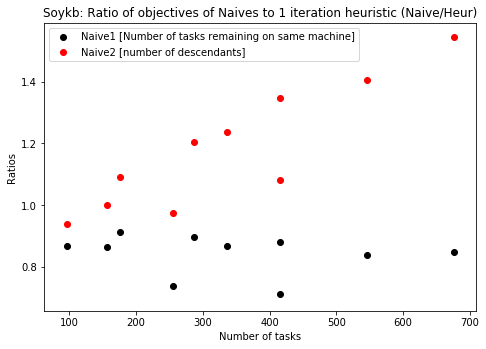

In [3]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


#print(ub_ratio)
#plt.scatter(obj_lb_lst[:,0], obj_lb_lst[:,1], label='lower bound', color="g", linewidths=0.1)


# plt.scatter(x, y, s=5, label='opt/lb', color='b')
plt.scatter(x, ratios1, label='Naive1 [Number of tasks remaining on same machine]', color='k')
plt.scatter(x, ratios2, label='Naive2 [number of descendants]', color='r')
#plt.scatter(x, naives, label='Naives', color='g')
plt.xlabel('Number of tasks')
plt.ylabel('Ratios')
plt.title("Soykb: Ratio of objectives of Naives to 1 iteration heuristic (Naive/Heur)")
plt.legend()
plt.show()

In [7]:
import csv
with open("soykb_both_naives_heur_3_machines.csv", 'w+') as f:
    writer = csv.writer(f)
    writer.writerow(["task_size", "naive1", "heuristic", "upperbound"])
    writer.writerows(zip(x,  naives1, naives2, heur,  ubs))